# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [7]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
### RM
With the number of rooms the size of the house most likely increase. Therefore an increase in 'RM' leads to an increase in 'MEDV' in most cases.
### LSTAT
I expect a House with a lower percentage of lower class homeowners in the neighboorhood to be in a "better" neighborhood, thus having a increased price. So I assume a higher 'LSTAT' decreases the value of 'MEDV'. 
### PTRATIO
I guess for this feature you can say it increases 'MEDV' with its own increase. Most upperclass families have very few to no children so this feature also kind of talks about the neighborhood.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [12]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score 
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [13]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

0.922855648536
Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
##### *Would you consider this model to have successfully captured the variation of the target variable? Why or why not?*
I would say yes, because the predicted values are really close to the true value in most cases (unless the last one). The R^2 value of *0.923* for this prediction also supports this statement.


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [15]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split as ttf
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = ttf(features,prices,train_size=.8,test_size=.2,random_state=8)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
##### *What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*
For a learning algorithm, you will need some data to train the algorithm. Thus we need training data. To ensure the functionality of the algorithm and get a metric, we also need to have some data for testing. Testing means, we compare the output of the algorithm with the results of the test data for the same inputs. If this data would be the same as the training data, we have the risk of overfitting the algorithm (which will very likely happen in this case). We might get 100% results for this training set, but only for this set of data. So we need training data to fit the algorithm, but also a different set of data to test the algorithm on different data. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

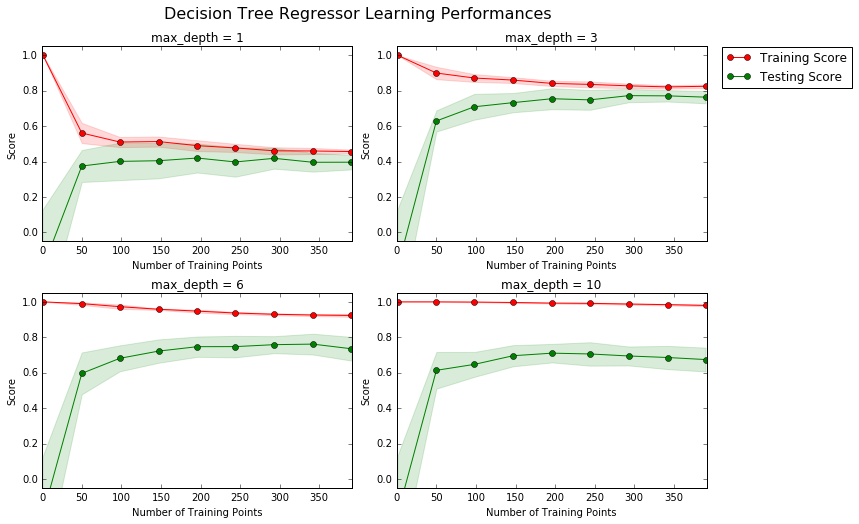

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
##### *Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added?*
I choose the **upper right** graph. Its maximum depth is **3**. The curve of the training score decreases with more training points added. This is due to the algorithm overfitting with really few (< 50) samples.
##### *What about the testing curve?*
The testing curve is rising with more training points because more training points lead (in most cases) to better overall coverage (unless your algorithm is overfitted).
##### *Would having more training points benefit the model?*
I think this depends on the structure of the data. If the added training points consist of many outliers, this would not be beneficial. But for "normal" training data, this would most likely benefit the model. This hold at least for the point where the model converges to a particular score. At this point more training points would not really benefit the model.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

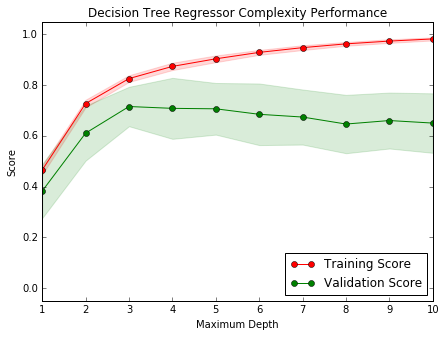

In [17]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
##### *When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?*
This Model suffers from high variance as the depth is not enough to fully represent the whole data set.
##### *How about when the model is trained with a maximum depth of 10?*
This Model suffers from high bias as the model seems to be overfitted.
##### *What visual cues in the graph justify your conclusions?*
My Conclusions are justified by the low scores for the model with a depth of 1. From a depth of 3 on the training score of the model increases and the validation score decreases which is a cue for overfitting as the model seems to be too specialized only for this particular set of training data.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
##### *Which maximum depth do you think results in a model that best generalizes to unseen data?*
The best maximum depth seems to be **3**.
##### *What intuition lead you to this answer?*
From 3 on the validation score seems to decrease and only the training score increases. Thus more depth than 3 seems to overfit the model.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
##### *What is the grid search technique and how it can be applied to optimize a learning algorithm?*
The grid search technique describes the searching for a optimal setting of a set of parameters. By defining a finite set of settings for each parameter the model can be tested against a metric and thus the best configuration for this special set of settings can be found.


### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
##### *What is the k-fold cross-validation training technique?*
With the k-fold cross-validation training technique you divide the data into k bins. Now you iterate k times and choose each time the i-th bin as test-data and the rest as training data. 
##### *What benefit does this technique provide for grid search when optimizing a model?*
If you use grid search for a not cross-validated set your parameters might only be optimized for this particular training set you used. Thus you can ensure when using this technique that the parameters found by grid search are the best of the manually defined configurations for the whole data set.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [32]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,params,scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [34]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

0.350691573918
0.451847188047
0.34158003922
0.666529921335
0.655222418397
0.670375370142
0.7634492151
0.760319280744
0.752097924235
0.739507603587
0.795463399884
0.780591153218
0.727308688771
0.681803560887
0.761953676153
0.669922857117
0.649996681046
0.734017205009
0.652155551703
0.663233357455
0.737961147508
0.634958139856
0.670915763156
0.768954587058
0.623532730785
0.656543551463
0.765257368256
0.588855935428
0.60922598429
0.71311978077
Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
##### *What maximum depth does the optimal model have?*
Parameter 'max_depth' is 4 for the optimal model.

##### *How does this result compare to your guess in Question 6?*
In Question 6 I guessed 3 which had a higher validation score for the graph presented there.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [35]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $402,531.82
Predicted selling price for Client 2's home: $237,900.00
Predicted selling price for Client 3's home: $923,766.67


**Answer: **
##### *What price would you recommend each client sell his/her home at?*
I would recommend Client 1 to sell his home at \$ 400,000 Client 2 should try to sell it for at least \$ 280,000, as the suggested price seems too low. I would suggest Client 3 to sell his house at \$ 880,000.
##### *Do these prices seem reasonable given the values for the respective features?*
I think Client 1 seems resonable. Client 2 is too low, because a bad neighborhood and 1 room less dont account for more than \$ 170,000 less. Client 3 might be a bit too expensive as the house is more than double the price of Client 1 with only 3 rooms more.<br/>
<hr>
Overall the features dont seem sufficient to me, to give a really reasonable recommendation to home sellers.


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [36]:
vs.PredictTrials(features, prices, fit_model, client_data)

0.296395704806
0.406028089559
0.382860656793
0.578815100042
0.698434642122
0.608684739636
0.733142901988
0.788917310873
0.730748185834
0.824896708399
0.770233267546
0.762858588665
0.81913072563
0.782395298532
0.76467564979
0.787124338105
0.784017875846
0.751348537388
0.779035213778
0.782709126981
0.744547645331
0.665567427261
0.753653313072
0.742310129572
0.629769666657
0.745343548115
0.713153520453
0.633351519649
0.739380333184
0.708065448675
Trial 1: $411,000.00
0.251490075832
0.406521768931
0.412004218022
0.569755740846
0.705816198048
0.656443427009
0.703073369848
0.811798052738
0.788190923669
0.75570818806
0.832965982046
0.794324058919
0.718172089987
0.820209280956
0.777666476353
0.733989396662
0.804351423135
0.777379608726
0.725959761791
0.788530066307
0.770906083754
0.729207123721
0.793024235134
0.713626760982
0.704129457353
0.785394789255
0.691266108718
0.704041710705
0.790339821123
0.675538770678
Trial 2: $411,417.39
0.384414821334
0.404970636066
0.391495230363
0.658887920313
0

### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
#### *In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting*
##### *How relevant today is data that was collected from 1978?*
This data is cleary outdated as the neighborhood and likings of home owners have cleary shifted. Thus the data is not that much relevant for today
##### *Are the features present in the data sufficient to describe a home?*
No. One of the biggest missing features is for example the size of the building and its property. For example two homes with the same amount of rooms might totally differ in size and therefore in prices.
##### *Is the model robust enough to make consistent predictions?*
I think the model is not robust enough to make consistent predictions because the few features used are not enough to make consistent future predictions.
##### *Would data collected in an urban city like Boston be applicable in a rural city?*
No. For example the pupil to teacher count might fit to Boston, but in a rural area there are often family friendly neighborhoods which have a higher pupil to teacher ratio but are really attracting to young families and therefore have higher prices in general.